#Vinicius de Barros Silva 10335913

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 20)        1520      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 10, 10, 40)        20040     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 40)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1000)              0         
                                                                 
 dropout_14 (Dropout)        (None, 1000)             

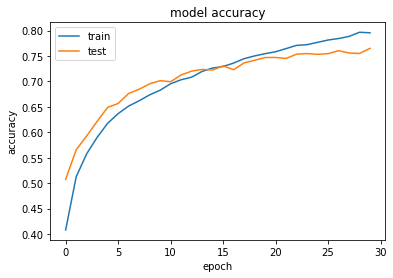

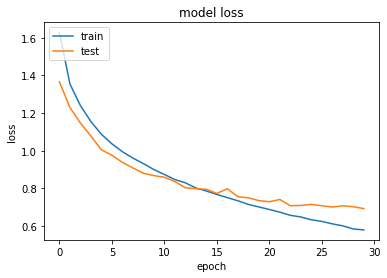

313/313 - 1s - loss: 0.6930 - accuracy: 0.7651 - 771ms/epoch - 2ms/step
Test loss: 0.6930282115936279
Test accuracy: 0.7651000022888184


In [ ]:
#cnn1.py 
import os; os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt; import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def impHistoria(history):
  print(history.history.keys())
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy'); plt.ylabel('accuracy'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss'); plt.ylabel('loss'); plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

batch_size = 100; num_classes = 10; epochs = 30

nl, nc = 32,32
(ax, ay), (qx, qy) = cifar10.load_data()

#ax = ax.reshape(ax.shape[0], nl, nc, 3)
#qx = qx.reshape(qx.shape[0], nl, nc, 3)
input_shape = (nl, nc, 3)

ax = ax.astype('float32'); ax /= 255; ax -=0.5; #-0.5 a +0.5
qx = qx.astype('float32'); qx /= 255; qx -=0.5; #-0.5 a +0.5
ay = keras.utils.to_categorical(ay, num_classes) #2 -> 0 0 1 0 0 0 0 0 0 0
qy = keras.utils.to_categorical(qy, num_classes)

model = Sequential() #nx32x32x3
model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=input_shape)) #nx28x28x20
model.add(MaxPooling2D(pool_size=(2,2))) #nx14x14x20
model.add(Conv2D(40, kernel_size=(5,5), activation='relu')) #nx10x10x40
model.add(MaxPooling2D(pool_size=(2,2))) #nx5x5x40
model.add(Flatten()) #nx1000
model.add(Dropout(0.40))
model.add(Dense(1000, activation='relu')) #nx1000
model.add(Dropout(0.40))
model.add(Dense(num_classes, activation='softmax')) #nx10

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn1.png', show_shapes=True)
model.summary()

opt=optimizers.Adamax()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator()
history=model.fit(datagen.flow(ax, ay, batch_size=batch_size), 
  steps_per_epoch=ax.shape[0]//batch_size,
 epochs=epochs, verbose=2, validation_data=(qx, qy))
impHistoria(history)

score = model.evaluate(qx, qy, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save('cnn1.h5')